# ARIMA y LSTM en viento solar

## Base de datos de esta sesión
https://omniweb.gsfc.nasa.gov/form/omni_min.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("omni_5min_8tumX9FHkB.lst.txt",delimiter="\s+",names=["year","day","hour","minute","V","T"],parse_dates=True)

In [46]:
data

,year,day,hour,minute,V,T
0,2020,1,0,0,295.6,24010.0
1,2020,1,0,5,99999.9,9999999.0
2,2020,1,0,10,297.7,33936.0
3,2020,1,0,15,296.3,34855.0
4,2020,1,0,20,295.2,27156.0
...,...,...,...,...,...,...
317083,2023,5,23,35,351.9,280794.0
317084,2023,5,23,40,353.4,276398.0
317085,2023,5,23,45,355.2,267784.0
317086,2023,5,23,50,355.7,257858.0


Arreglemos un poco los datos

In [47]:
data[data==99999.9]=np.nan
data[data==9999999.0]=np.nan

In [48]:
data

,year,day,hour,minute,V,T
0,2020,1,0,0,295.6,24010.0
1,2020,1,0,5,NaN,NaN
2,2020,1,0,10,297.7,33936.0
3,2020,1,0,15,296.3,34855.0
4,2020,1,0,20,295.2,27156.0
...,...,...,...,...,...,...
317083,2023,5,23,35,351.9,280794.0
317084,2023,5,23,40,353.4,276398.0
317085,2023,5,23,45,355.2,267784.0
317086,2023,5,23,50,355.7,257858.0


In [49]:
pd.date_range("2020-01-01 00:00", "2023-01-05 23:55", freq="5min")

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:05:00',
               '2020-01-01 00:10:00', '2020-01-01 00:15:00',
               '2020-01-01 00:20:00', '2020-01-01 00:25:00',
               '2020-01-01 00:30:00', '2020-01-01 00:35:00',
               '2020-01-01 00:40:00', '2020-01-01 00:45:00',
               ...
               '2023-01-05 23:10:00', '2023-01-05 23:15:00',
               '2023-01-05 23:20:00', '2023-01-05 23:25:00',
               '2023-01-05 23:30:00', '2023-01-05 23:35:00',
               '2023-01-05 23:40:00', '2023-01-05 23:45:00',
               '2023-01-05 23:50:00', '2023-01-05 23:55:00'],
              dtype='datetime64[ns]', length=317088, freq='5T')

In [50]:
data.index=pd.date_range("2020-01-01 00:00", "2023-01-05 23:55", freq="5min")

In [51]:
data=data[["V","T"]]

In [52]:
data

,V,T
2020-01-01 00:00:00,295.6,24010.0
2020-01-01 00:05:00,NaN,NaN
2020-01-01 00:10:00,297.7,33936.0
2020-01-01 00:15:00,296.3,34855.0
2020-01-01 00:20:00,295.2,27156.0
...,...,...
2023-01-05 23:35:00,351.9,280794.0
2023-01-05 23:40:00,353.4,276398.0
2023-01-05 23:45:00,355.2,267784.0
2023-01-05 23:50:00,355.7,257858.0


<AxesSubplot: >

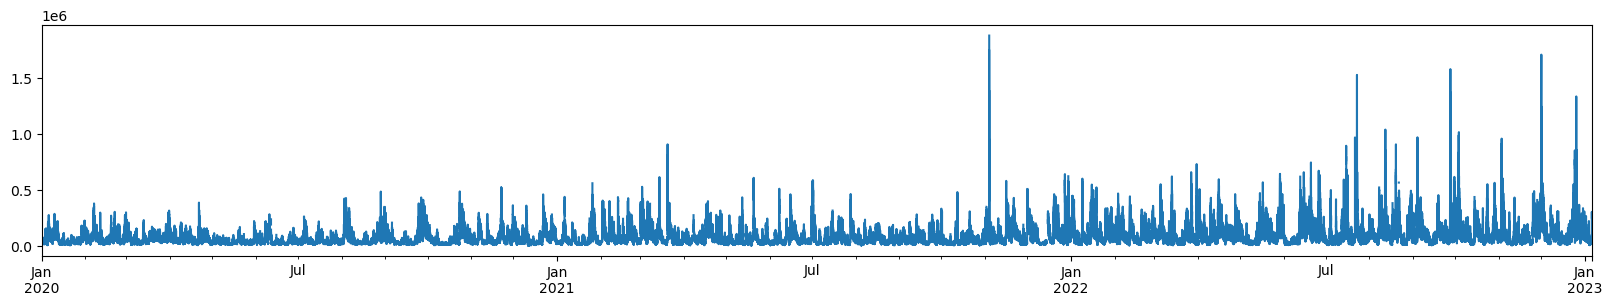

In [53]:
data["T"].plot(figsize=(20,3))

In [54]:
data0=data.resample("D").mean()

In [55]:
data0

,V,T
2020-01-01,319.435223,40064.408907
2020-01-02,333.193798,35624.062016
2020-01-03,354.748302,76592.230189
2020-01-04,384.346377,48691.202899
2020-01-05,383.199138,86352.741379
...,...,...
2023-01-01,542.346388,104208.551331
2023-01-02,457.025660,71516.973585
2023-01-03,398.992164,73260.876866
2023-01-04,405.407420,21898.367491


<AxesSubplot: >

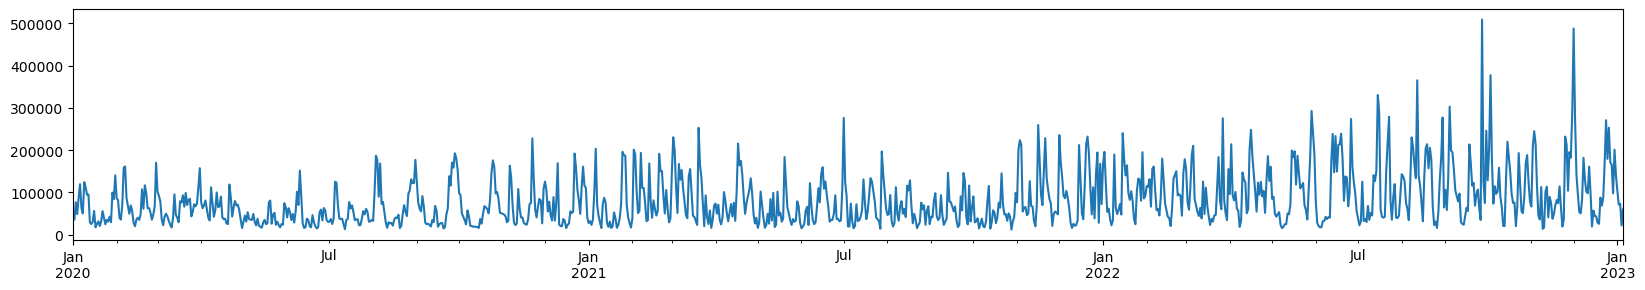

In [56]:
data0["T"].plot(figsize=(20,3))

## Primero vamos con el ARIMA

In [57]:
import warnings
import itertools
import statsmodels.api as sm

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
# 1. Comprobación de la estacionalidad:
# Decompose the time series

In [59]:
result_est = seasonal_decompose(data0["T"], model='add')

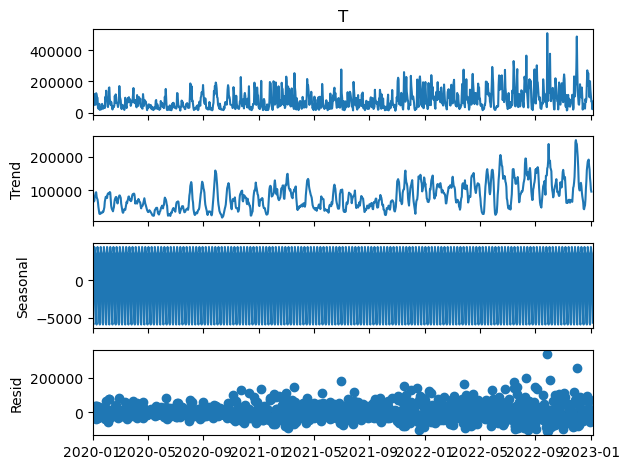

In [60]:
result_est.plot()
plt.show()

In [61]:
# 3.3. Statistical Test:
## Augmented Dickey-Fuller Test:
## Use the Augmented Dickey-Fuller (ADF) test to formally test for stationarity. The null hypothesis of the ADF test is that the time series has a unit root (non-stationary), and the alternative hypothesis is that it is stationary.
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result_adf = adfuller(data0["T"])  # Replace 'column_name' with the actual column containing your data

# Print the test statistic and p-value
print(f'Test Statistic: {result_adf[0]}')
print(f'P-value: {result_adf[1]}')
print(f'Critical Values: {result_adf[4]}')

Test Statistic: -9.622062549072075
P-value: 1.6986374537034143e-16
Critical Values: {'1%': -3.436336023678866, '5%': -2.8641831050780513, '10%': -2.568177274243656}


<Figure size 1200x600 with 0 Axes>

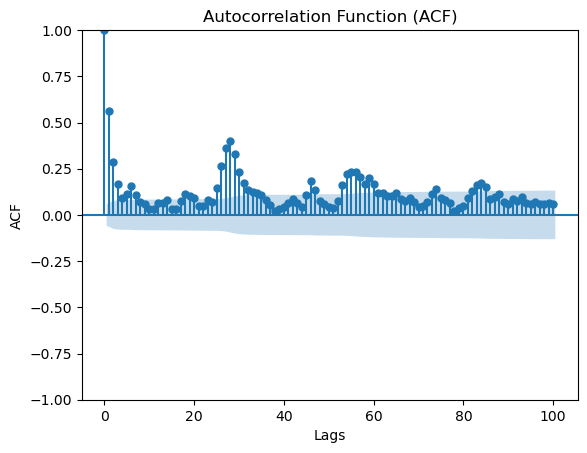

<Figure size 1200x600 with 0 Axes>

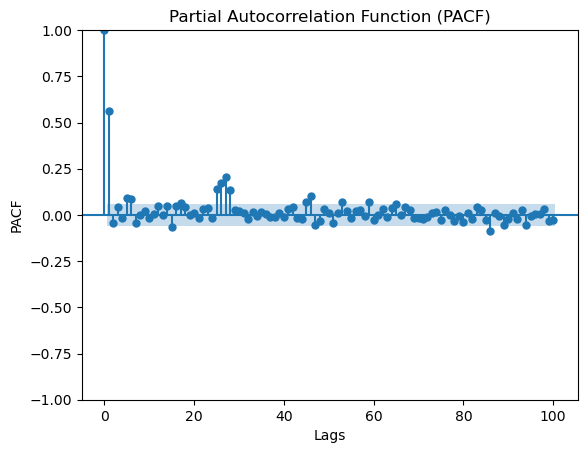

In [62]:
#4. ACF and PACF analysis:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming y_diff is your differenced series
# Replace 'y_diff' with the variable name of your differenced series

plt.figure(figsize=(12, 6))

# ACF plot
plot_acf(data0["T"], lags=100, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))

# PACF plot
plot_pacf(data0["T"], lags=100, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

In [63]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

In [64]:
parameters,PARAMETERS,AIC=[],[],[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data0["T"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=-1)
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            parameters.append(param)
            PARAMETERS.append(param_seasonal)
            AIC.append(results.aic)
        except:
            continue
resultados=pd.DataFrame({"Tendencia":parameters,"Estacionalidad":PARAMETERS,"AIC":AIC})

In [65]:
resultados

,Tendencia,Estacionalidad,AIC
0,"(0, 0, 0)","(0, 0, 0, 30)",28514.823341
1,"(0, 0, 0)","(0, 0, 1, 30)",27428.958570
2,"(0, 0, 0)","(0, 1, 0, 30)",27108.474732
3,"(0, 0, 0)","(0, 1, 1, 30)",25956.446460
4,"(0, 0, 0)","(1, 0, 0, 30)",26992.980433
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 30)",25786.902809
60,"(1, 1, 1)","(1, 0, 0, 30)",26235.077977
61,"(1, 1, 1)","(1, 0, 1, 30)",26213.360805
62,"(1, 1, 1)","(1, 1, 0, 30)",25983.127072


In [66]:
resultados[resultados["AIC"]==resultados["AIC"].min()]

,Tendencia,Estacionalidad,AIC
43,"(1, 0, 1)","(0, 1, 1, 30)",25697.662341


In [67]:
mod = sm.tsa.statespace.SARIMAX(data0["T"],
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16954D+01    |proj g|=  1.52804D-01

At iterate    5    f=  1.16691D+01    |proj g|=  2.21129D-02

At iterate   10    f=  1.16665D+01    |proj g|=  5.64721D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     18      1     0     0   5.647D-06   1.167D+01
  F =   11.666513324807262     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err      

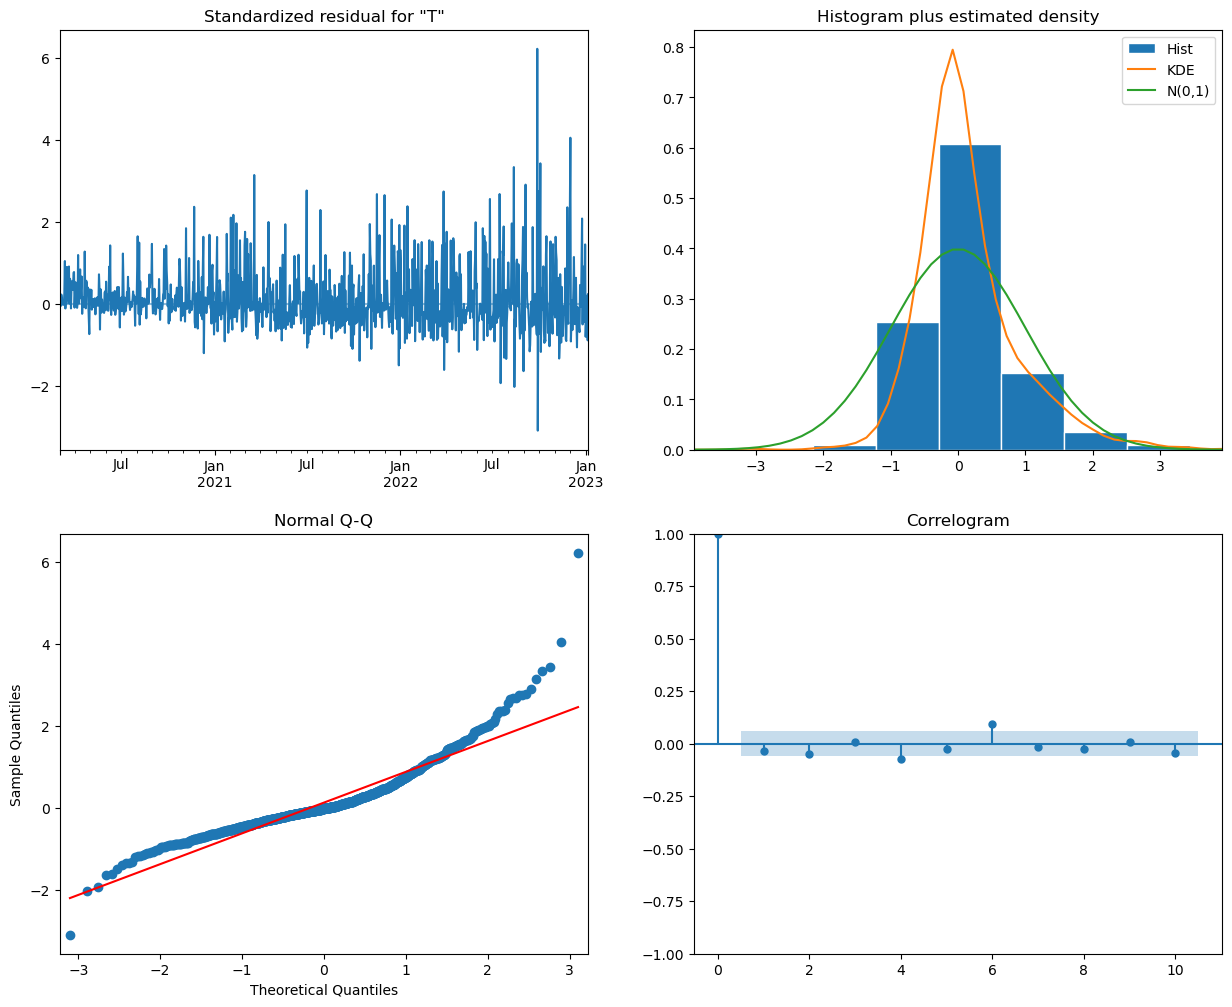

In [68]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [69]:
pred = results.get_prediction(start=pd.to_datetime('2022-05-01'), dynamic=False)
pred_ci = pred.conf_int()

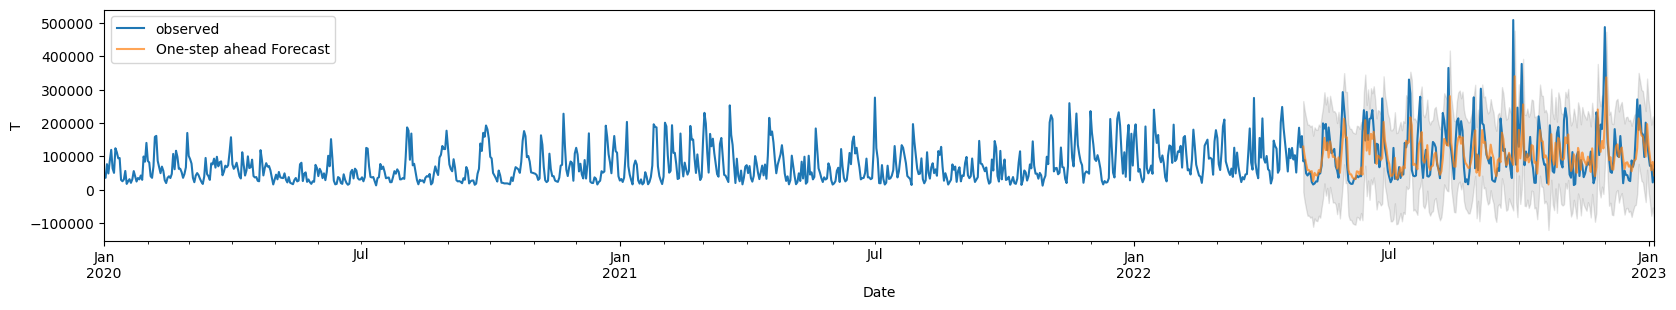

In [70]:
ax = data0["T"].plot(label='observed',figsize=(20,3))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('T')
plt.legend()

plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(pred.predicted_mean,data0[data0.index>="2022-05-01"]["T"]))

72825.26040529777

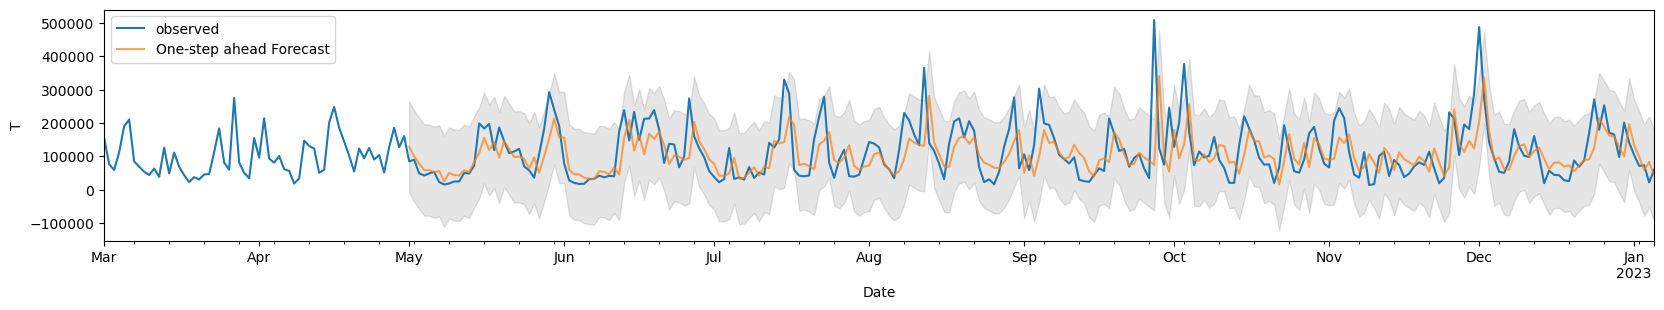

In [72]:
ax = data0["T"].plot(label='observed',figsize=(20,3))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('T')
plt.legend()
plt.xlim("2022-03-01","2023-01-05")
plt.show()

In [73]:
np.sqrt(mean_squared_error(pred.predicted_mean,data0[data0.index>="2022-05-01"]["T"]))/data0[data0.index>="2022-05-01"]["T"].mean()

0.6335891185427298

In [74]:
r2_score(pred.predicted_mean,data0[data0.index>="2022-05-01"]["T"])

-1.1196393672275593

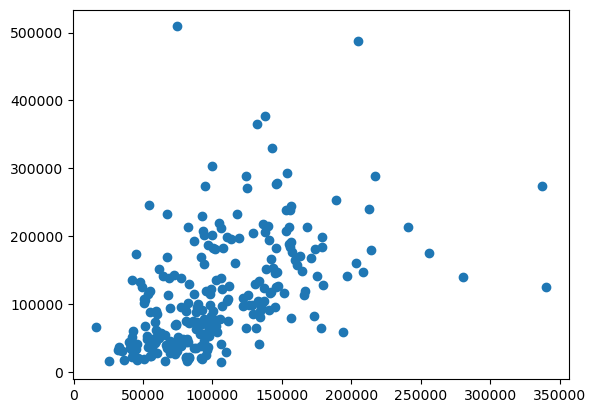

In [75]:
plt.scatter(pred.predicted_mean,data0[data0.index>="2022-05-01"]["T"])

## Ahora vamos con el LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("omni_5min_Kx6J2QwU1w.lst.txt",delimiter="\s+",names=["year","day","hour","minute","B","Bzgse","Bzgsm","V","D","T"],parse_dates=True)

In [3]:
data

,year,day,hour,minute,B,Bzgse,Bzgsm,V,D,T
0,2022,1,0,0,6.82,-4.43,-3.58,396.3,7.59,94848.0
1,2022,1,0,5,7.08,-3.84,-2.90,393.4,7.41,95997.0
2,2022,1,0,10,7.50,-3.84,-2.99,394.7,7.19,104239.0
3,2022,1,0,15,7.67,-5.23,-4.70,393.4,7.33,97787.0
4,2022,1,0,20,7.61,-5.35,-4.88,393.9,7.00,91747.0
...,...,...,...,...,...,...,...,...,...,...
106555,2023,5,23,35,9.06,5.62,3.39,351.9,4.68,280794.0
106556,2023,5,23,40,9.01,4.89,2.55,353.4,4.88,276398.0
106557,2023,5,23,45,8.81,4.64,2.34,355.2,4.63,267784.0
106558,2023,5,23,50,8.72,4.44,2.14,355.7,4.53,257858.0


In [4]:
data.index=pd.date_range("2022-01-01 00:00", "2023-01-05 23:55", freq="5min")

In [5]:
data[data==99999.9]=np.nan
data[data==9999999.0]=np.nan
data[data==9999.99]=np.nan

In [6]:
data["B"].max(), data["B"].min()

(30.6, 0.32)

/tmp/ipykernel_80861/1519515123.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['V'])


<AxesSubplot: xlabel='V', ylabel='Density'>

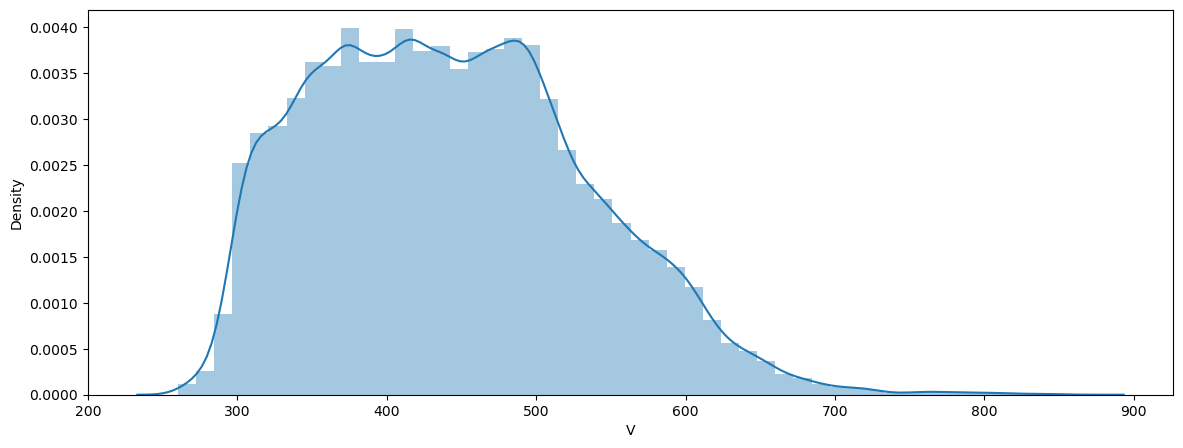

In [8]:
from scipy import stats
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data["V"])
 
import seaborn as sns
plt.figure(figsize = (14,5))
sns.distplot(data['V'])
#sns.distplot(fitted_data)

In [9]:
data_d=data.resample("D").mean()
data_h=data.resample("60T").mean()


/tmp/ipykernel_80861/3652555806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_h['V'])


<AxesSubplot: xlabel='V', ylabel='Density'>

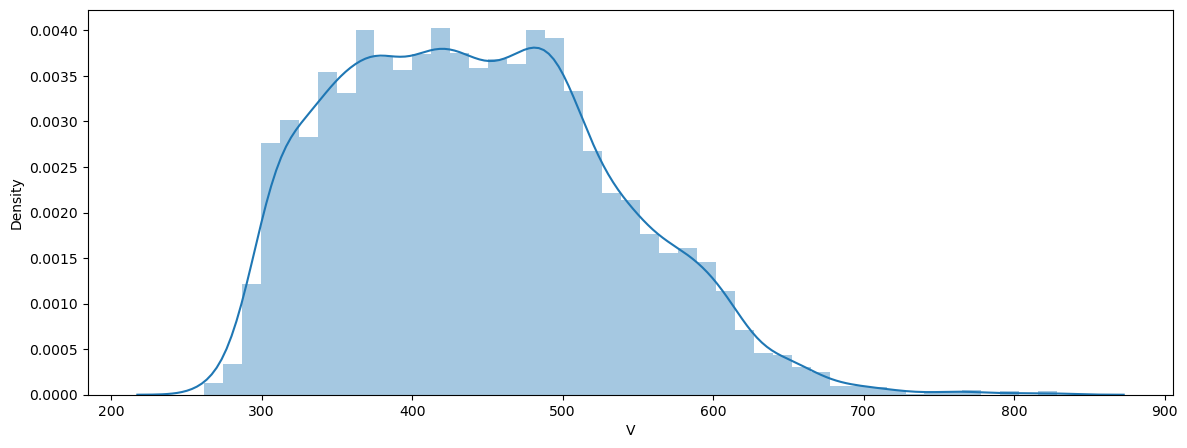

In [10]:
import seaborn as sns
plt.figure(figsize = (14,5))
sns.distplot(data_h['V'])

In [11]:
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)


n_input = 10

df_min_model_data = (data_h['V'].dropna()-data_h['V'].dropna().min())/(data_h['V'].dropna().max()-data_h['V'].dropna().min())

X, y = Sequential_Input_LSTM(df_min_model_data, n_input)

In [12]:
N1,N2=int(len(data_h)*0.8),int(len(data_h)*0.9)
# Training data
X_train, y_train = X[:N1], y[:N1]

# Validation data
X_val, y_val = X[N1:N2], y[N1:N2]

# Test data
X_test, y_test = X[N2:], y[N2:]

In [13]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam 

2023-11-16 21:04:13.423302: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 21:04:13.424685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 21:04:13.444162: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 21:04:13.444182: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 21:04:13.444197: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [14]:
n_features = 1                        

model1 = Sequential()

model1.add(InputLayer((n_input,n_features)))
model1.add(LSTM(100, return_sequences = True))     
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

2023-11-16 21:04:14.967768: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-11-16 21:04:14.967786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: Frigg
2023-11-16 21:04:14.967789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: Frigg
2023-11-16 21:04:14.967926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.129.3
2023-11-16 21:04:14.967936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.129.3
2023-11-16 21:04:14.967939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.129.3


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 151817 (593.04 KB)
Trainable params: 151817 (593.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model1.compile(loss = MeanSquaredError(), 
               optimizer = Adam(learning_rate = 0.0001), 
               metrics = RootMeanSquaredError())

model1.fit(X_train, y_train, 
           validation_data = (X_val, y_val), 
           epochs = 50, 
           callbacks = [early_stop])

Epoch 1/50
222/222 [==============================] - 4s 10ms/step - loss: 0.0164 - root_mean_squared_error: 0.1279 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 2/50
222/222 [==============================] - 2s 7ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 3/50
222/222 [==============================] - 2s 8ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618
Epoch 4/50
222/222 [==============================] - 2s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0598
Epoch 5/50
222/222 [==============================] - 2s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 6/50
222/222 [==============================] - 2s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0037 - val

<AxesSubplot: >

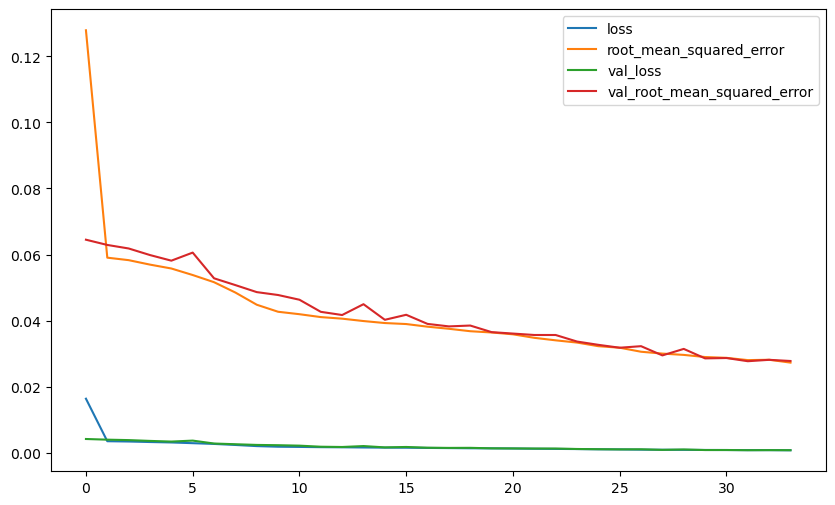

In [16]:
losses_df1 = pd.DataFrame(model1.history.history)

losses_df1.plot(figsize = (10,6))

In [17]:
test_predictions1 = model1.predict(X_test).flatten()


X_test_list = []
for i in range(len(X_test)):
    X_test_list.append(X_test[i][0])
    

test_predictions_df1 = pd.DataFrame({'X_test':list(X_test_list), 
                                    'LSTM Prediction':list(test_predictions1)})

24/24 [==============================] - 1s 3ms/step


In [18]:
test_predictions_df1

,X_test,LSTM Prediction
0,0.428116,0.408817
1,0.407296,0.414366
2,0.424296,0.419529
3,0.418933,0.414347
4,0.461924,0.416342
...,...,...
743,0.196706,0.158849
744,0.186862,0.170755
745,0.176413,0.168225
746,0.165954,0.159683


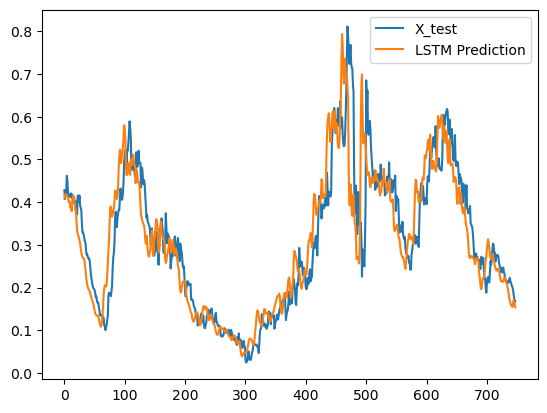

In [19]:
test_predictions_df1["X_test"].plot()
test_predictions_df1["LSTM Prediction"].plot()
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_predictions_df1["LSTM Prediction"],test_predictions_df1["X_test"]))/test_predictions_df1["X_test"].mean()

0.2514750284156702